# **Deep Learning**

## Práctico 2: Reconocimiento de imágenes del CIFAR-10 usando CNN

Integrantes:
* Mario Ferreyra
* Emiliano Kokic
* Francisco Crespo

---

### Librerias

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import keras
from keras.datasets import cifar10
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, concatenate, Dropout
from keras.layers import Conv2D, MaxPooling2D, Activation, BatchNormalization

import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
np.random.seed(1)  # For Reproducibility

In [3]:
sns.set_style('whitegrid')
sns.set_context('talk')

---

In [4]:
def plot_loss_and_accuracy(model_history, acc_metric):
    plt.figure(figsize=(18,6))

    # Loss Curves
    plt.subplot(1,2,1)
    plt.plot(model_history.history['loss'], color='#3c8fb9', linewidth=2, linestyle='dotted')
    plt.plot(model_history.history['val_loss'], color='#f47a50', linewidth=3)
    plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.title('Loss Curves', fontsize=16)

    # Accuracy Curves
    plt.subplot(1,2,2)
    plt.plot(model_history.history[acc_metric], color='#3c8fb9', linewidth=2, linestyle='dotted')
    plt.plot(model_history.history['val_' + acc_metric], color='#f47a50', linewidth=3)
    plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.title('Accuracy (' + acc_metric + ') Curves', fontsize=16)

    plt.show()

---
### Cargamos los datos del CIFAR-10

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
print('X_train shape', X_train.shape)
print('y_train shape:', y_test.shape)
print('X_test shape', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape (50000, 32, 32, 3)
y_train shape: (10000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [7]:
# Parameters
BATCH_SIZE = 128  # For mini-batch gradient descent
NUM_CLASSES = 10
EPOCHS = 10
INPUT_SIZE = 32 * 32 * 3
TRAIN_EXAMPLES = 50000
TEST_EXAMPLES = 10000

# Reshape the dataset to convert the examples from 2D matrixes to 1D arrays.
X_train = X_train.reshape(TRAIN_EXAMPLES, INPUT_SIZE)
X_test = X_test.reshape(TEST_EXAMPLES, INPUT_SIZE)

# normalize the input
X_train = X_train / 255 # RGB
X_test = X_test / 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [8]:
X_train.shape

(50000, 3072)

Necesitamos redimensionar el input para obtener la imagen en 2D

In [9]:
IMG_ROWS = 32  # Heigth
IMG_COLS = 32  # Width
CHANNELS = 3  # Color Channels (RGB)

X_train = X_train.reshape(X_train.shape[0], IMG_ROWS, IMG_COLS, CHANNELS)
X_test = X_test.reshape(X_test.shape[0], IMG_ROWS, IMG_COLS, CHANNELS)

input_shape = (IMG_ROWS, IMG_COLS, CHANNELS)
print("Input_Shape = {}".format(input_shape))

Input_Shape = (32, 32, 3)


In [10]:
X_train.shape

(50000, 32, 32, 3)

### CNN simple

In [11]:
model = Sequential()
model.add(Conv2D(
    32,
    (3, 3),
    padding='same',
    input_shape=X_train.shape[1:],
    activation='relu'
))
#model.add(Activation('relu'))
model.add(Conv2D(
    32,
    (3, 3),
    activation='relu'
))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(
    64,
    (3, 3),
    padding='same',
    activation='relu'
))
#model.add(Activation('relu'))
model.add(Conv2D(
    64,
    (3, 3),
    activation='relu'
))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
#model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))
#model.add(Activation('softmax'))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adadelta(),
    metrics=['accuracy']
)

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [13]:
%%time

history01 = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_split=0.1
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 64s 1ms/step - loss: 1.9057 - acc: 0.3049 - val_loss: 1.6187 - val_acc: 0.3996
Epoch 2/10
45000/45000 [==============================] - 63s 1ms/step - loss: 1.4810 - acc: 0.4652 - val_loss: 1.2631 - val_acc: 0.5516
Epoch 3/10
45000/45000 [==============================] - 63s 1ms/step - loss: 1.2659 - acc: 0.5489 - val_loss: 1.1323 - val_acc: 0.6090
Epoch 4/10
45000/45000 [==============================] - 63s 1ms/step - loss: 1.1203 - acc: 0.6028 - val_loss: 1.0271 - val_acc: 0.6412
Epoch 5/10
45000/45000 [==============================] - 63s 1ms/step - loss: 1.0046 - acc: 0.6452 - val_loss: 0.9223 - val_acc: 0.6758
Epoch 6/10
45000/45000 [==============================] - 62s 1ms/step - loss: 0.9246 - acc: 0.6742 - val_loss: 0.8398 - val_acc: 0.7160
Epoch 7/10
45000/45000 [==============================] - 63s 1ms/step - loss: 0.8524 - acc: 0.7006 - val_loss: 0.7862 - val_acc:

10000/10000 [==============================] - 3s 321us/step
Test loss 0.7077504747390747
Test accuracy 0.7561


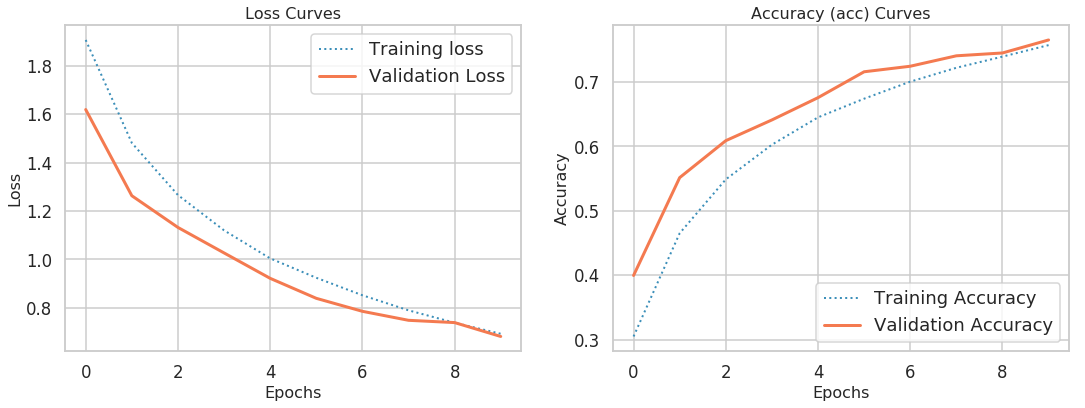

In [14]:
score = model.evaluate(X_test, y_test)

print("Test loss", score[0])
print("Test accuracy", score[1])

plot_loss_and_accuracy(history01, 'acc')

---
### CNN un poco más compleja

In [15]:
CONV_FILTERS = 32
POOL_SIZE = (2, 2)
INP = Input(shape=(X_train.shape[1:]), dtype='float32')
print(INP.shape)

conv1_1 = Conv2D(
    filters=CONV_FILTERS,
    kernel_size=(3, 3),
    activation='relu', 
    kernel_regularizer=keras.regularizers.l2(l=0.1)
)(INP)

btch1_1 = BatchNormalization()(conv1_1)
maxp1_1 = MaxPooling2D(pool_size=POOL_SIZE)(btch1_1)
drp1_1 = Dropout(0.2)(maxp1_1)
flat1_1 = Flatten()(drp1_1)

conv1_2 = Conv2D(
    filters=CONV_FILTERS,
    kernel_size=(4, 4),
    activation='relu',
    kernel_regularizer=keras.regularizers.l2(l=0.1)
)(INP)

btch1_2 = BatchNormalization()(conv1_2)
maxp1_2 = MaxPooling2D(pool_size=POOL_SIZE)(btch1_2)
drp1_2 = Dropout(0.2)(maxp1_2)
flat1_2 = Flatten()(drp1_2)

conv1_3 = Conv2D(
    filters=CONV_FILTERS,
    kernel_size=(5,5),
    activation='relu',
    kernel_regularizer=keras.regularizers.l2(l=0.1)
)(INP)

btch1_3 = BatchNormalization()(conv1_3)
maxp1_3 = MaxPooling2D(pool_size=POOL_SIZE)(btch1_3)
drp1_3 = Dropout(0.2)(maxp1_3)
flat1_3 = Flatten()(drp1_3)

# Gather all convolution layers
cnct = concatenate([flat1_1, flat1_2, flat1_3], axis=1)
drp1 = Dropout(0.2)(cnct)
dns1 = Dense(128, activation='relu')(drp1)
drp2 = Dropout(0.2)(dns1) 
out = Dense(NUM_CLASSES, activation='softmax')(drp2)

model = Model(inputs=INP, outputs=out)

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adadelta(),
    metrics=['accuracy']
)

(?, 32, 32, 3)


In [16]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 30, 30, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 29, 29, 32)   1568        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 28, 28, 32)   2432        input_1[0][0]                    
__________________________________________________________________________________________________
batch_norm

In [17]:
%%time

history02 = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_split=0.1
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 90s 2ms/step - loss: 2.1541 - acc: 0.4569 - val_loss: 2.3826 - val_acc: 0.3954
Epoch 2/10
45000/45000 [==============================] - 86s 2ms/step - loss: 1.3951 - acc: 0.5664 - val_loss: 1.2805 - val_acc: 0.5898
Epoch 3/10
45000/45000 [==============================] - 87s 2ms/step - loss: 1.2025 - acc: 0.6176 - val_loss: 2.0392 - val_acc: 0.5044
Epoch 4/10
45000/45000 [==============================] - 87s 2ms/step - loss: 1.0988 - acc: 0.6488 - val_loss: 1.5795 - val_acc: 0.5828
Epoch 5/10
45000/45000 [==============================] - 87s 2ms/step - loss: 1.0103 - acc: 0.6779 - val_loss: 1.3419 - val_acc: 0.5540
Epoch 6/10
45000/45000 [==============================] - 87s 2ms/step - loss: 0.9558 - acc: 0.6978 - val_loss: 2.2763 - val_acc: 0.4144
Epoch 7/10
45000/45000 [==============================] - 86s 2ms/step - loss: 0.9116 - acc: 0.7119 - val_loss: 1.5912 - val_acc:

10000/10000 [==============================] - 10s 974us/step
Test loss 1.3903221681594848
Test accuracy 0.5645


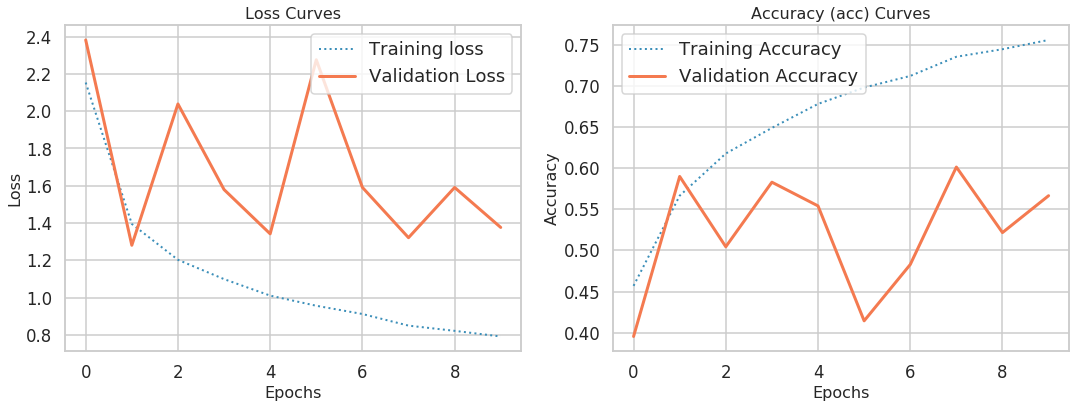

In [18]:
score = model.evaluate(X_test, y_test)

print("Test loss", score[0])
print("Test accuracy", score[1])

plot_loss_and_accuracy(history02, 'acc')

---
### Otra CNN

In [19]:
model = Sequential()
model.add(Conv2D(
    16,
    (3, 3),
    input_shape=X_train.shape[1:],
    activation='relu')
)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(
    32,
    (3, 3),
    activation='relu')
)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)              0         
__________

In [21]:
%%time

history03 = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_split=0.1
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 19s 414us/step - loss: 1.6466 - acc: 0.3977 - val_loss: 1.3769 - val_acc: 0.5102
Epoch 2/10
45000/45000 [==============================] - 16s 352us/step - loss: 1.3067 - acc: 0.5305 - val_loss: 1.1502 - val_acc: 0.5974
Epoch 3/10
45000/45000 [==============================] - 16s 354us/step - loss: 1.1622 - acc: 0.5851 - val_loss: 1.0695 - val_acc: 0.6360
Epoch 4/10
45000/45000 [==============================] - 16s 355us/step - loss: 1.0502 - acc: 0.6267 - val_loss: 0.9490 - val_acc: 0.6714
Epoch 5/10
45000/45000 [==============================] - 16s 356us/step - loss: 0.9718 - acc: 0.6562 - val_loss: 0.9241 - val_acc: 0.6832
Epoch 6/10
45000/45000 [==============================] - 16s 352us/step - loss: 0.8951 - acc: 0.6838 - val_loss: 0.8632 - val_acc: 0.7018
Epoch 7/10
45000/45000 [==============================] - 16s 359us/step - loss: 0.8288 - acc: 0.7051 - val_loss: 0.8

10000/10000 [==============================] - 1s 120us/step
Test loss 0.8491932634353637
Test accuracy 0.7096


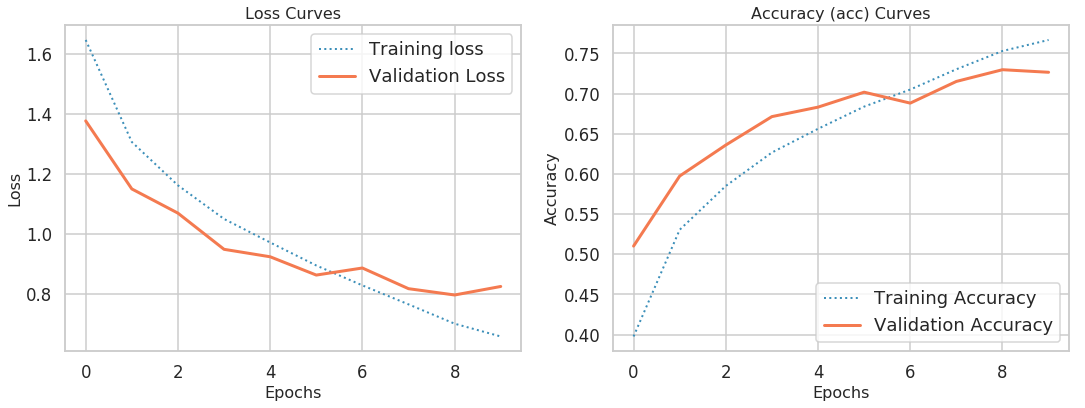

In [22]:
score = model.evaluate(X_test, y_test)

print("Test loss", score[0])
print("Test accuracy", score[1])

plot_loss_and_accuracy(history03, 'acc')

---
Hasta ahora parece funcionar mejor el modelo más simple. Podemos probar distintas cosas:

- Correrlo por más epocas.
- Probar distintos % de Dropout.
- Probar distintos tamaños de filtros.
- Probar distintos regularizadores.
- Probar distintos optimizadores.
- Agregar/quitar capas densas y/o de activación.
- Etc.
---